# Informe de la Felicidad Mundial hasta el 2015

# Objetivo del Proyecto

A fin de obtener el informe de la felicidad mundial del año 2015, voy a hacer predicciones utilizando la esperanza de vida y tasa de desempleo para definir la felicidad percibida (baja o alta) de los habitantes de un determinado país.

Se construirán modelos de clasificación usando Decision Trees (árboles de decisión) y Logistic Regression Algorithms (Algoritmos de Regresión Logística) con el objetivo de elegir el que tenga mejor rendimiento a fin de hacer el análisis respectivo indicando mis conclusiones.

Cabe destacar que es posible lo que deseo hacer con el conjunto de datos que consolidé de las fuentes World Bank, Gapminder, y World Happiness Report


## Importar Librerías
Importar las librerías necesarias: pandas, NumPy y matplotlib; funcionalidades de sklearn y una pequeña biblioteca de funciones de conveniencia utilizadas específicamente para este proyecto. Siéntase libre de abrir el archivo "functions.py" para ver el contenido.

In [1]:
# Librerías del Core

import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot

# Procesamiento de Sklearn

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Algoritmos de clasificación Sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Función de evaluación del modelo de clasificación Sklearn

from sklearn.metrics import accuracy_score

# Funciones de conveniencia

from functions import * 

# 2.	Adquirir y Limpiar los Datos

Luego de definir el objetivo del proyecto procedí con la recolección y limpieza de la data, siendo éste el principal recurso de Machine Learning.

Es importante entender las fortalezas y limitaciones de la data porque pocas veces estas coincidirán con el problema a resolver. Así mismo, es importante tener presente que no necesariamente tendremos toda la data necesaria para resolver el problema. En algunos casos se tendrá que recurrir fuentes externas, tal fue mi caso para el análisis e implementación del presente proyecto.

## Cargar los Datos


Se consolidó la información del Banco Mundial, Gapminder y el Informe Mundial sobre la Felicidad. 

Seleccioné algunas de las características disponibles de estas fuentes, se hizo calidad de datos y se realizó la atribución de los mismos para proporcionar las medidas más recientes de cada país hasta el 2015.

In [2]:
# Cargar el data set

dataset = pd.read_csv("Datos_Felicidad_Mundial_2015.csv")

## Inspeccionar los Datos

Identificar el número de características (columnas) y muestras (filas).

In [3]:
# Examinar la dimensión de la matriz

dataset.shape

(194, 17)

Visualizar la información con la que estoy tratando.

In [4]:
# Inspeccionar las primeras filas

dataset.head()

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,11.0,NaN,39.0,NaN,NaN,NaN,73.2,4.80,5800.0,2090.0,33700000
1,Albania,4.606651,11000.0,77.6,97.7,91.4,NaN,6.090,96.8,29.0,2.30,808.0,14.0,1.71,NaN,3190.0,2920000
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,43.1,0.856,97.9,41.4,4.65,2020.0,11.6,2.31,95000.0,3230.0,43400000
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,36.7,7.110,99.6,32.4,1.12,1020.0,14.0,1.66,3600.0,2930.0,2920000
4,Australia,7.309061,43800.0,82.6,100.0,100.0,60.2,1.240,NaN,34.7,1.11,5480.0,3.8,1.86,22000.0,3280.0,23800000


Renombrar Columnas.

In [5]:
dt_Felicidad_Mundial_2015 = dataset.rename(columns={'country': 'País', 'happiness': 'Felicidad','income': 'Ingresos','lifeexp': 'Expectativa_Vida','sanitation': 'Saneamiento','water': 'Agua','urbanpopulation': 'Población_Urbana','unemployment': 'Desempleo','literacy': 'Alfabetización','inequality': 'Desigualdad','murder': 'Asesinato','energy': 'Energía','childmortality': 'Mortalidad_Infantil','fertility': 'Fertilidad','hiv': 'VIH', 'foodsupply': 'Suministro_Alimentos', 'population': 'Población_Total'})
print(dt_Felicidad_Mundial_2015)

                    País  Felicidad  Ingresos  Expectativa_Vida  Saneamiento  \
0            Afghanistan   3.982855    1750.0              57.9         39.2   
1                Albania   4.606651   11000.0              77.6         97.7   
2              Argentina   6.697131   19100.0              76.5         94.8   
3                Armenia   4.348320    8180.0              75.4         91.6   
4              Australia   7.309061   43800.0              82.6        100.0   
..                   ...        ...       ...               ...          ...   
189                Tonga        NaN    5190.0              70.3         93.5   
190  Trinidad and Tobago        NaN   31300.0              73.1         92.1   
191               Tuvalu        NaN    3320.0               NaN         91.4   
192              Vanuatu        NaN    2810.0              63.6         53.5   
193        Liechtenstein        NaN       NaN               NaN        100.0   

      Agua  Población_Urbana  Desempleo

Comprobar que los tipos de datos son sensatos para cada característica, es decir, que ninguna característica numérica se muestre como object.

In [6]:
# Revisar el tipo de dato

dt_Felicidad_Mundial_2015.dtypes

País                     object
Felicidad               float64
Ingresos                float64
Expectativa_Vida        float64
Saneamiento             float64
Agua                    float64
Población_Urbana        float64
Desempleo               float64
Alfabetización          float64
Desigualdad             float64
Asesinato               float64
Energía                 float64
Mortalidad_Infantil     float64
Fertilidad              float64
VIH                     float64
Suministro_Alimentos    float64
Población_Total           int64
dtype: object

Revisar si hay registros nulos.

In [37]:
# Revisar si hay registros nulos

dt_Felicidad_Mundial_2015.isnull().mean().sort_values()

País                           0.0
Felicidad                      0.0
Ingresos                       0.0
Expectativa_Vida               0.0
Saneamiento                    0.0
Agua                           0.0
Alfabetización                 0.0
Desigualdad                    0.0
Energía                        0.0
Mortalidad_Infantil            0.0
Fertilidad                     0.0
VIH                            0.0
Suministro_Alimentos           0.0
Población_Total                0.0
Expectativa_Vida_Predictiva    0.0
dtype: float64

## Limpieza de Datos

Al tener la data a mi disposición se continúa con el pre-procesamiento de la misma, esto normalmente lo conocemos como la limpieza de los datos.

El objetivo de ésta etapa es manipular y convertir la data de tal forma que se produzcan mejores resultados.

Como ejemplos típicos de limpieza de datos tenemos:  Eliminar o inferir datos nulos, categorizar los valores de las variables, normalizar los valores numéricos o escalarlos para que se puedan comparar.

En la limpieza de datos se hizo lo siguiente:

Los números representan el porcentaje de filas nulas en cada característica. Estas características: Asesinato, Población Urbana y Desempleo tienen muchos valores nulos. Si dejara los nulos, estaría estimando un gran número de valores por lo que voy a descartarlos.

In [8]:
# Discard very sparse features

dt_Felicidad_Mundial_2015 = dt_Felicidad_Mundial_2015.drop(["Asesinato","Población_Urbana","Desempleo"], axis=1)

A las demás características solo les asignaré el valor medio de cada una.

In [9]:
# Calcular la media de cada característica

means = dt_Felicidad_Mundial_2015.mean().to_dict()

# Asignar cada nulo con la media de esa característica

for m in means:
    dt_Felicidad_Mundial_2015[m] = dt_Felicidad_Mundial_2015[m].fillna(value=means[m])

Efectivamente no tengo registros nulos luego de haber agregado la media en cada característica.

In [10]:
# Revisar si hay registros nulos

dt_Felicidad_Mundial_2015.isnull().mean()

País                    0.0
Felicidad               0.0
Ingresos                0.0
Expectativa_Vida        0.0
Saneamiento             0.0
Agua                    0.0
Alfabetización          0.0
Desigualdad             0.0
Energía                 0.0
Mortalidad_Infantil     0.0
Fertilidad              0.0
VIH                     0.0
Suministro_Alimentos    0.0
Población_Total         0.0
dtype: float64

# 3. Comprender los Datos

En ésta etapa se llevaron a cabo los siguientes pasos:

### Estadísticas Descriptivas

Calculé las estadísticas descriptivas, las cuales dan una idea del rango y la extensión de los valores para cada característica. También, da la oportunidad de verificar cualquier eventualidad, como estadísticas que no coinciden con la descripción de la función, dando como resultado que sean datos erróneos, ya sea desde la fuente o del proceso de limpieza.

Las estadísticas descriptivas dan una idea del rango y la extensión de los valores de cada característica y nos permite detectar patrones inesperados. 

In [11]:
# Procesar las estadísticas descriptivas

dt_Felicidad_Mundial_2015.describe()

,Felicidad,Ingresos,Expectativa_Vida,Saneamiento,Agua,Alfabetización,Desigualdad,Energía,Mortalidad_Infantil,Fertilidad,VIH,Suministro_Alimentos,Población_Total
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02,194.000000,1.940000e+02
mean,5.395765,17432.849741,71.933690,73.838247,86.329381,81.573826,38.579375,2183.725325,31.441451,2.835924,2.179917e+05,2845.952381,3.787195e+07
std,0.953547,19072.580021,7.466359,29.269367,17.568245,17.055722,7.257464,2618.536430,31.237992,1.336162,5.521169e+05,413.199619,1.419670e+08
min,2.701591,623.000000,49.600000,7.080000,19.300000,25.300000,16.600000,9.580000,2.200000,1.240000,6.000000e+01,1880.000000,1.100000e+04
25%,4.891838,3297.500000,66.425000,49.225000,77.900000,75.575000,34.000000,614.500000,8.200000,1.790000,1.025000e+04,2570.000000,1.982500e+06
50%,5.395765,11050.000000,72.550000,87.900000,94.950000,81.573826,38.579375,1565.000000,17.900000,2.415000,7.000000e+04,2845.952381,8.435000e+06
75%,5.880369,24100.000000,77.400000,97.700000,99.300000,95.375000,42.175000,2425.000000,49.225000,3.687500,2.179917e+05,3140.000000,2.742500e+07
max,7.603434,120000.000000,83.800000,100.000000,100.000000,100.000000,63.000000,18600.000000,137.000000,7.290000,5.600000e+06,3770.000000,1.400000e+09


### Visualizar - Matriz de Correlación

Utilicé la matriz de correlación para detectar correlaciones entre las características con el objetivo de detectar buenas correlaciones de Expectativa_Vida con otras características ya que es la que voy a predecir. Usaré una de las funciones de conveniencia que se encuentran en el archivo “functions.py”:

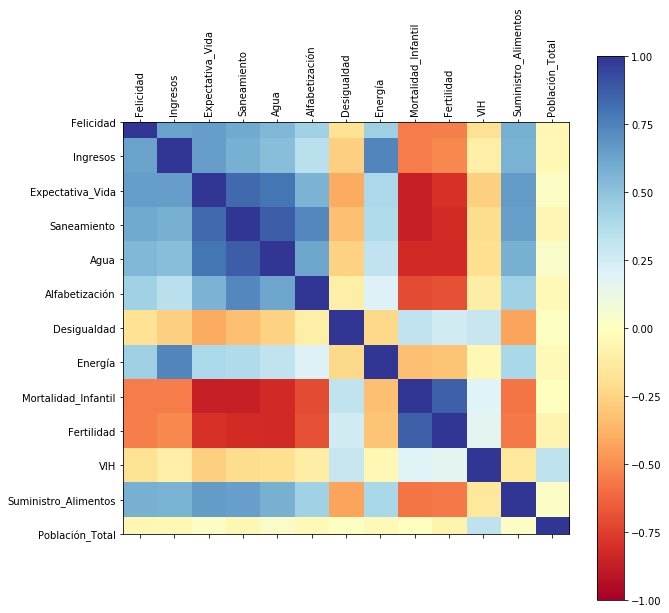

In [12]:
# Display a correlation matrix

correlationMatrix(dt_Felicidad_Mundial_2015)

La barra de color que está a lado derecho muestra los colores que representan diferentes niveles de correlación.

Partiendo de la característica Expectativa_Vida, se obtienen las siguientes observaciones:

- Las características: Saneamiento, el Agua, el Suministro de Alimentos y la Felicidad están en azul oscuro, lo que indica fuertes correlaciones positivas con la vida. 

- Las características: Mortalidad y Fertilidad Infantil están en rojo oscuro, lo que indica fuertes correlaciones negativas con la vida. 

Conforme a éstas observaciones surge la siguiente pregunta:

¿Estas observaciones se ajustan a la comprensión de los factores que pueden influir en la esperanza de vida? 

R/: Si lo hacen, son buenas noticias ya que el modelo lo va a captar y va a exponer la situación del mundo con datos reales que corresponden al 2015, lo cual demuestra el buen uso del conocimiento del dominio para el proyecto en cuestión.

Por otra parte, hice varios diagramas (box plots) para comprender la distribución de cada característica a fin de tener un panorama más claro. 

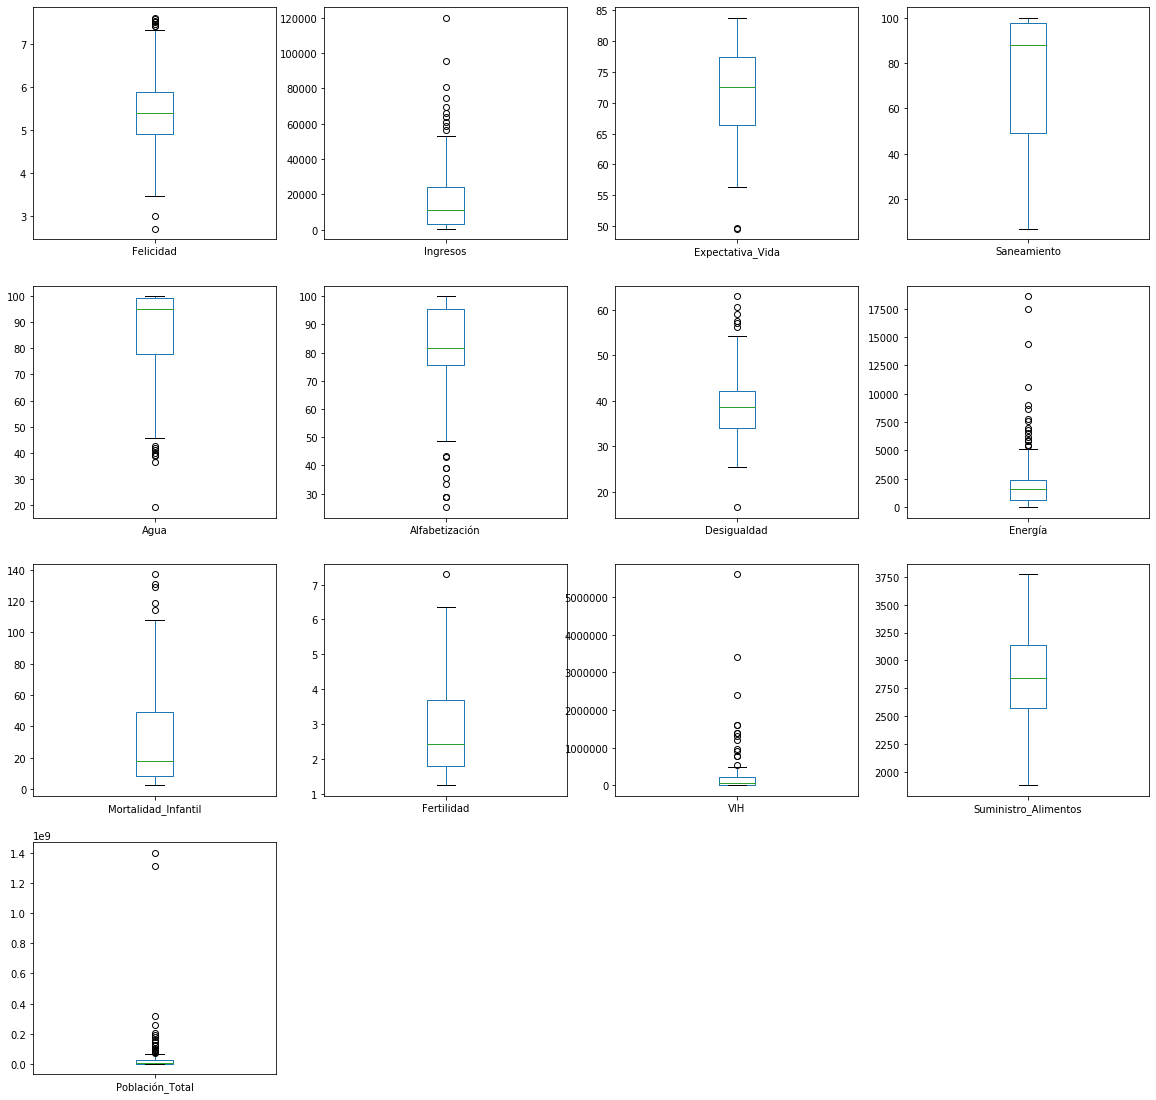

In [13]:
# Visualizar boxplots para cada característica numérica

boxPlotAll(dt_Felicidad_Mundial_2015)

Nuevamente:

¿Estos diagramas reflejan la comprensión de los datos? ¿Hay alguna sorpresa? 

R/: Si los hay, más adelante se investigarán más a fondo.


# 4. Preparar los Datos

Una vez que disponemos de la data recolectada, limpia y analizada se lleva a cabo el procesamiento de la misma.

El objetivo de ésta etapa es hacer predicciones sobre la esperanza de vida de un determinado país a partir del conjunto de métricas del mismo. 

### Característica "ExpectativaVida_Predictiva”

Se creó la característica "ExpectativaVida_Predictiva", la cuál es la característica defina como target (destino) en donde los datos se agruparon en las categorías “Baja, Media y Alta”.

Se añadió la función appendEqualCountsClass() (se puede encontrar en el archivo "functions.py").


In [14]:
# Crear el target "Expectativa_Vida_Predictiva" clasificándose como "Baja", "Media" y "Alta"grupo

dt_Felicidad_Mundial_2015 = appendEqualCountsClass(dt_Felicidad_Mundial_2015, "Expectativa_Vida_Predictiva", "Expectativa_Vida", 3, ["Baja","Media","Alta"])

Se comprobó que la distribución es uniforme a las filas requeridas a través de las categorías previamente creadas.

In [15]:
# Comprobar cuántas filas hay en cada categoría

dt_Felicidad_Mundial_2015.Expectativa_Vida_Predictiva.value_counts()

Alta     65
Baja     65
Media    64
Name: Expectativa_Vida_Predictiva, dtype: int64

Efectivamente el resultado es como se esperaba.

In [16]:
# Comprobar que funcione como se espera

dt_Felicidad_Mundial_2015[['Expectativa_Vida','Expectativa_Vida_Predictiva']].head()

,Expectativa_Vida,Expectativa_Vida_Predictiva
0,57.9,Baja
1,77.6,Alta
2,76.5,Alta
3,75.4,Media
4,82.6,Alta


### Características Divididas como Entrada y Destinoo	

Se clasificaron unas características como entrada y otras como target (destino). Antes de hacer dicha clasificación es importante recordar las columnas que tenemos a nuestra disposición:

In [17]:
dt_Felicidad_Mundial_2015.columns

Index(['País', 'Felicidad', 'Ingresos', 'Expectativa_Vida', 'Saneamiento',
       'Agua', 'Alfabetización', 'Desigualdad', 'Energía',
       'Mortalidad_Infantil', 'Fertilidad', 'VIH', 'Suministro_Alimentos',
       'Población_Total', 'Expectativa_Vida_Predictiva'],
      dtype='object')

Se seleccionó "Expectativa_Vida_Predictiva" como nuestra característica de destino (la que predecimos) y todo lo demás como las características de entrada (las que usaremos para hacer la predicción).

In [18]:
# Dividir en características de entrada y de destino

y = dt_Felicidad_Mundial_2015["Expectativa_Vida_Predictiva"]
X = dt_Felicidad_Mundial_2015[['Felicidad', 'Ingresos', 'Saneamiento', 'Agua', 'Alfabetización', 'Desigualdad', 'Energía', 'Mortalidad_Infantil', 'Fertilidad',  'VIH', 'Suministro_Alimentos', 'Población_Total']]

In [19]:
X.head()

,Felicidad,Ingresos,Saneamiento,Agua,Alfabetización,Desigualdad,Energía,Mortalidad_Infantil,Fertilidad,VIH,Suministro_Alimentos,Población_Total
0,3.982855,1750.0,39.2,63.0,39.000000,38.579375,2183.725325,73.2,4.80,5800.000000,2090.0,33700000
1,4.606651,11000.0,97.7,91.4,96.800000,29.000000,808.000000,14.0,1.71,217991.677852,3190.0,2920000
2,6.697131,19100.0,94.8,99.6,97.900000,41.400000,2020.000000,11.6,2.31,95000.000000,3230.0,43400000
3,4.348320,8180.0,91.6,98.9,99.600000,32.400000,1020.000000,14.0,1.66,3600.000000,2930.0,2920000
4,7.309061,43800.0,100.0,100.0,81.573826,34.700000,5480.000000,3.8,1.86,22000.000000,3280.0,23800000


In [20]:
y.head()

0     Baja
1     Alta
2     Alta
3    Media
4     Alta
Name: Expectativa_Vida_Predictiva, dtype: category
Categories (3, object): [Baja < Media < Alta]

### Características de Escala

Es útil normalizar los datos para hacer más fácil la técnica de Machine Learning, por normalizar me refiero a poner todos los datos en una escala similar.

Cuando ejecuté dataset.describe(), el rango de valores entre el mínimo y el máximo era diferente entre las características. El Saneamiento iba de 7 a 100, pero los Ingresos iban de 623 a 120.000. Muchos algoritmos no funcionarán de manera óptima con datos en escalas tan diferentes, para evitarlo, escalé los datos antes de construir el modelo. En este caso, usé el MinMaxScaler() para escalar los datos de manera que cada característica vaya de 0 a 1.

In [21]:
X.describe()

,Felicidad,Ingresos,Saneamiento,Agua,Alfabetización,Desigualdad,Energía,Mortalidad_Infantil,Fertilidad,VIH,Suministro_Alimentos,Población_Total
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02,194.000000,1.940000e+02
mean,5.395765,17432.849741,73.838247,86.329381,81.573826,38.579375,2183.725325,31.441451,2.835924,2.179917e+05,2845.952381,3.787195e+07
std,0.953547,19072.580021,29.269367,17.568245,17.055722,7.257464,2618.536430,31.237992,1.336162,5.521169e+05,413.199619,1.419670e+08
min,2.701591,623.000000,7.080000,19.300000,25.300000,16.600000,9.580000,2.200000,1.240000,6.000000e+01,1880.000000,1.100000e+04
25%,4.891838,3297.500000,49.225000,77.900000,75.575000,34.000000,614.500000,8.200000,1.790000,1.025000e+04,2570.000000,1.982500e+06
50%,5.395765,11050.000000,87.900000,94.950000,81.573826,38.579375,1565.000000,17.900000,2.415000,7.000000e+04,2845.952381,8.435000e+06
75%,5.880369,24100.000000,97.700000,99.300000,95.375000,42.175000,2425.000000,49.225000,3.687500,2.179917e+05,3140.000000,2.742500e+07
max,7.603434,120000.000000,100.000000,100.000000,100.000000,63.000000,18600.000000,137.000000,7.290000,5.600000e+06,3770.000000,1.400000e+09


Muchos algoritmos no funcionarán al máximo cuando se les presenten tales datos, por lo que los escalaré para que todos estén en el rango de 0 a 1.

In [22]:
# Reescalar los datos

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# Convertir X de nuevo en un DataFrame de Pandas por conveniencia

X = pd.DataFrame(rescaledX, columns=X.columns)

Observe el resultado de ésta escalada. Ahora cada característica tiene un mínimo de 0 y un máximo de 1:

In [23]:
X.describe()

,Felicidad,Ingresos,Saneamiento,Agua,Alfabetización,Desigualdad,Energía,Mortalidad_Infantil,Fertilidad,VIH,Suministro_Alimentos,Población_Total
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.549625,0.140813,0.718449,0.830600,0.753331,0.473693,0.116950,0.216925,0.263789,0.038917,0.511086,0.027044
std,0.194528,0.159768,0.314995,0.217698,0.228323,0.156411,0.140854,0.231736,0.220853,0.098593,0.218624,0.101406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.446821,0.022404,0.453562,0.726146,0.673025,0.375000,0.032539,0.044510,0.090909,0.001820,0.365079,0.001408
50%,0.549625,0.087345,0.869780,0.937423,0.753331,0.473693,0.083668,0.116469,0.194215,0.012489,0.511086,0.006017
75%,0.648486,0.196663,0.975248,0.991326,0.938086,0.551185,0.129928,0.348850,0.404545,0.038917,0.666667,0.019582
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 5. Modelos de Construcción
Una vez que la data se ha procesado, el paso a seguir es elegir el algoritmo más adecuado en relación al caso a resolver.

Utilicé los modelos de Decision tree y Logistic Regression para definir cual tiene un mejor rendimiento.

Quero que ambos modelos tengan una oportunidad justa de triunfar. Así que tengo que presentar a ambos con un set de datos de prueba (test) y entrenamiento idénticos. Los generaré usando una semilla (seed) específica para obtener la misma muestra aleatoria cada vez que se ejecute éste código.

En la presente etapa se llevaron a cabo los siguientes pasos:

### Dividir en Conjuntos de Prueba y Entrenamiento
Se dividieron los conjuntos X e Y en conjuntos de prueba y entrenamiento.

In [24]:
# Dividir en sets de entrenamiento y prueba

test_size = 0.33
seed = 1
X_train, X_test, Y_train, Y_test =  train_test_split(X, y, test_size=test_size, random_state=seed)

### Crear Múltiples Modelos, Ajustarlos y Comprobarlos
Se construyeron y se ajustaron (fit) ambos modelos (Decision Tree y Logistic Regression) con los datos de entrenamiento.

Primero, el modelo Decision Tree:

In [25]:
# Construir un modelo de Decision Tree

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Luego, el modelo Logistic Regression:

In [26]:
# Construir un modelo de Logistic Regression

model_lr = LogisticRegression(solver='lbfgs', multi_class='auto')
model_lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Revisar los Modelos

Se comprueba lo bien que los modelos funcionaron con los datos de entrenamiento en sí, y se calcula la puntuación de precisión (accuracy score) para cada modelo, la cual es solo una métrica para evaluar los modelos de clasificación. La puntuación de precisión es:

Así mismo, se usan los datos de entrenamiento en ambos modelos para validar el rendimiento de los mismos.

In [27]:
# Verificar el rendimiento del modelo con los datos de entrenamiento

predictions_dt = model_dt.predict(X_train)
print("DecisionTreeClassifier", accuracy_score(Y_train, predictions_dt))

DecisionTreeClassifier 1.0


In [28]:
# Comprobar el rendimiento del modelo Logistic Regression con los datos de entrenamiento

predictions_lr = model_lr.predict(X_train)
print("LogisticRegression", accuracy_score(Y_train, predictions_lr))

LogisticRegression 0.8217054263565892


# 6. Evaluar los Modelos
Al revisar los modelos se identifica que la puntuación de precisión (accuracy score) de cada modelo de predicción con los datos de entrenamiento está por debajo de cada bloque. Basado en los datos de entrenamiento, el modelo Decision Tree ha hecho un gran trabajo consiguiendo el 100% de las clasificaciones correctas, sin embargo, no puedo confiar en las pruebas con los datos de entrenamiento. Por lo tanto, es necesario evaluar los modelos utilizando los datos definidos en el set de pruebas.

In [29]:
# Evaluar el modelo de Decision Tree

predictions_dt = model_dt.predict(X_test)
print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))

DecisionTreeClassifier 0.6615384615384615


In [30]:
# Evaludar el modelo de Logistic Regression

predictions_lr = model_lr.predict(X_test)
print("LogisticRegression", accuracy_score(Y_test, predictions_lr))

LogisticRegression 0.7230769230769231


Los resultados han cambiado.  El modelo Logistic Regression muestra una mejor puntuación de precisión al evaluarlos con los datos de la prueba, a pesar que el modelo Decision Tree se desempeñó mejor con los datos de entrenamiento.

El modelo Decision Tree tiende a sufrir éste problema, funciona bien en los datos de entrenamiento, pero rinden mal en los datos de la prueba. 

### Elegir el Modelo con Mejor Rendimiento
El modelo logistic regression es el modelo elegido ya que fue el que tuvo mejor rendimiento.

In [31]:
model = model_lr

# 7.	Finalizar e Implementar
Para tener una mejor comprensión los modelos se deben ver con más detalle. Los modelos Decision Tree y Logistic Regression utilizan formas muy diferentes para construiros, así que, cuando se visualizan de forma más detallada salen a relucir valores muy diferentes.

## Inspeccionar los Modelos

### Decision Tree
Aquí está el modelo Decision Tree creado para el presente proyecto. Admire la complejidad por un momento.

Para ejecutar el siguiente código, es se instaló graphviz.  La función viewDecisionTree() se puede encontrar en el archivo “functions.py”.

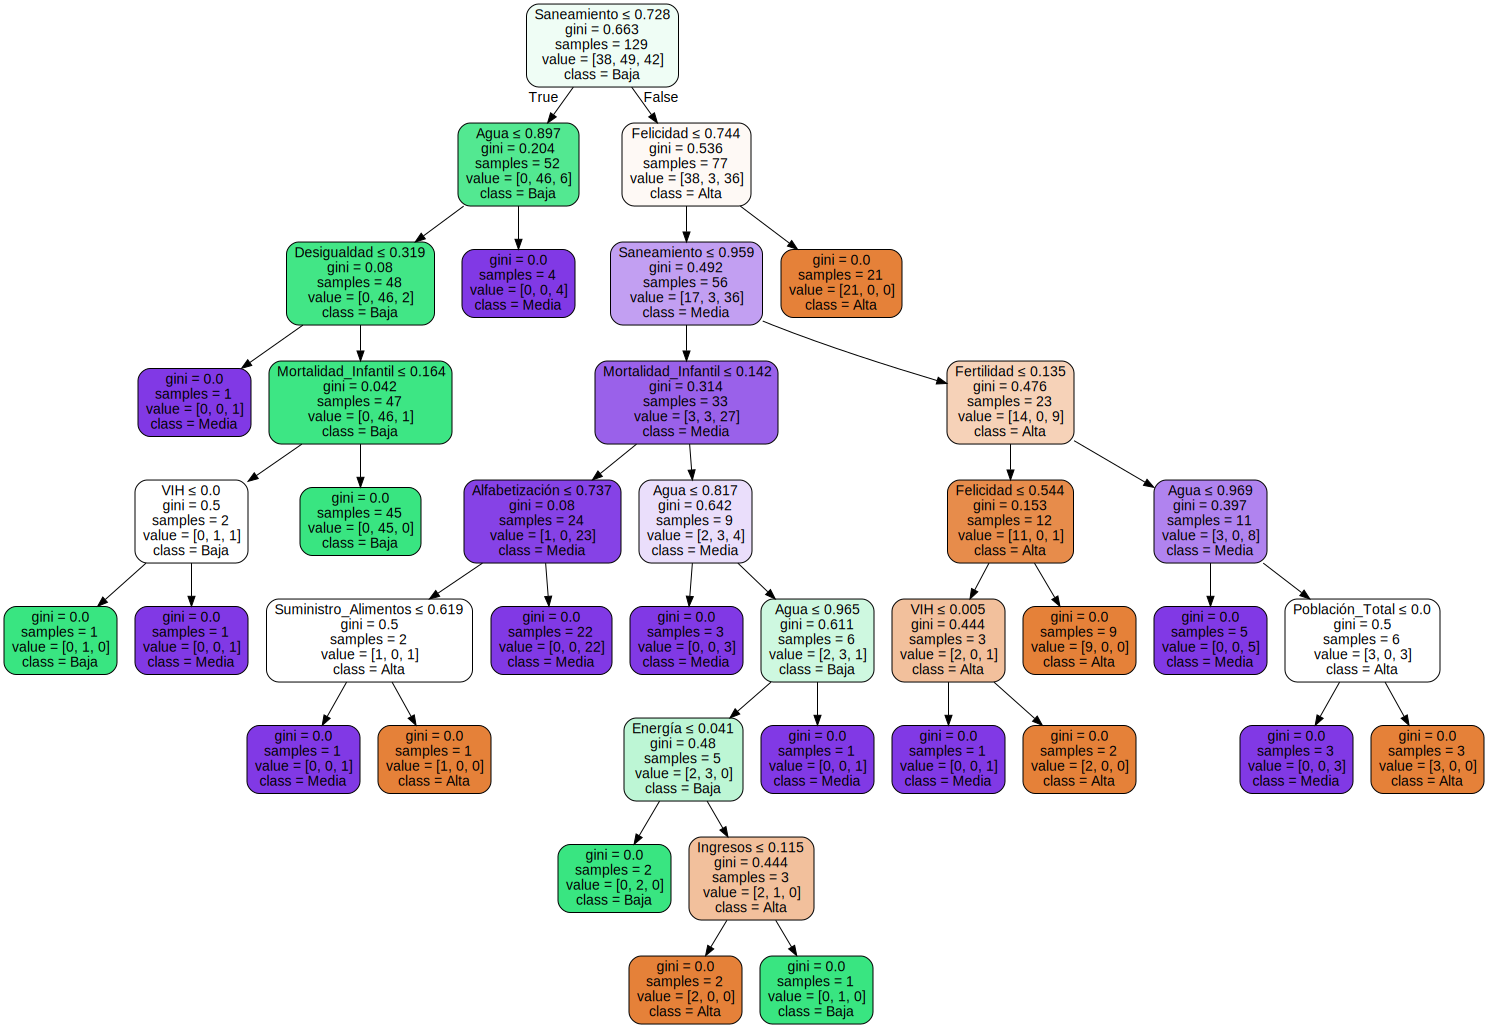

In [32]:
viewDecisionTree(model_dt, X.columns)

#### Importancia de las Características de Decision Tree

La importancia de las características que se muestra a continuación, examina cada una y determina la importancia que tienen en la construcción del modelo Decision Tree. 

La función decisionTreeSummary() se puede encontrar en el archivo “functions.py” en donde se utiliza el atributo feature_importances_ del DecisionTreeClassifier.

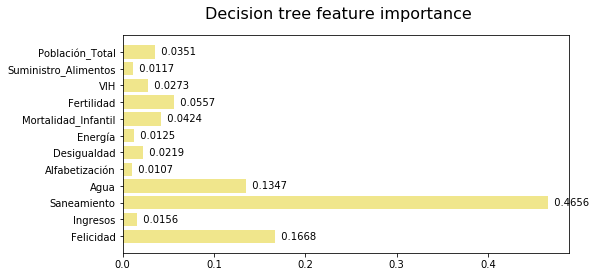

In [33]:
decisionTreeSummary(model_dt, X.columns)

En el gráfico previo, se muestra la reducción total de los Ingresos y se puede apreciar que el Saneamiento es la característica más importante, seguido de la Felicidad. Lo cual no me dice nada acerca de que clase ayuda a predecir cada característica, solo su impacto en la clasificación general. 

### Logistic Regression

#### Examinar los Coeficientes del Modelo Logistic Regression

Los coeficientes del modelo Logistic Regression definen la forma de la curva sigmoide que modela los datos. Hay un coeficiente para cada característica. El signo y la magnitud indican el grado que las características influyen en la decisión de clasificación. 

La función logisticRegressionSummary() se puede encontrar en el archivo “functions.py”. Se utiliza el atributo coef_ del LogisticRegressionClassifier.

In [34]:
model_lr.classes_

array(['Alta', 'Baja', 'Media'], dtype=object)

In [35]:
model_lr.coef_

array([[ 1.56109512,  1.43854829,  1.21032309,  0.71015589,  0.16496136,
        -0.21151471,  0.38168319, -0.90984066, -0.7007721 , -0.06693589,
         1.35850726, -0.26528544],
       [-1.04391607, -0.40989364, -1.85609818, -1.39903662, -0.71497946,
         0.2072231 , -0.15851575,  1.53414928,  1.15354453,  0.24971128,
        -0.74221789,  0.09642796],
       [-0.51717906, -1.02865465,  0.64577509,  0.68888074,  0.5500181 ,
         0.00429161, -0.22316744, -0.62430862, -0.45277243, -0.18277539,
        -0.61628937,  0.16885748]])

#### Gráficas (plots) de los Coeficientes del Modelo Logistic Regression.

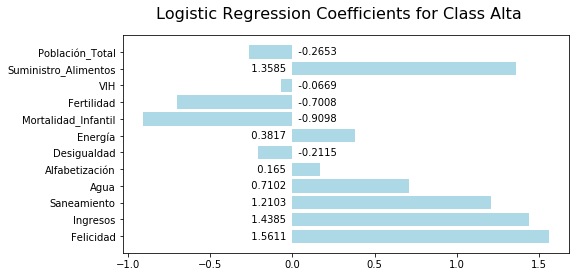

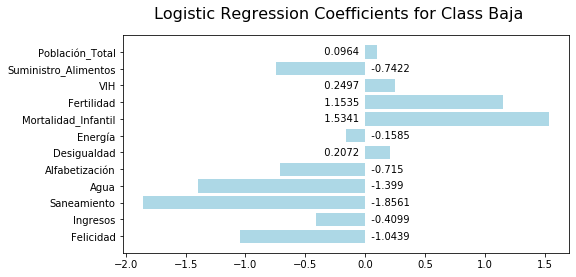

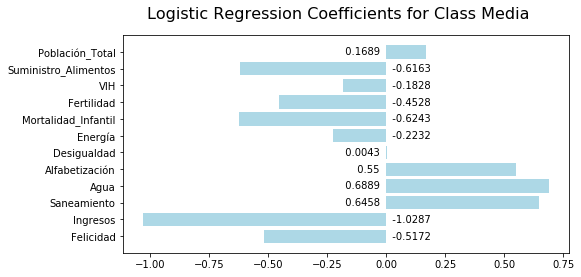

In [36]:
logisticRegressionSummary(model_lr, X.columns)

# Conclusiones

- En el primer gráfico se puede ver que el alto Suministro de Alimentos, los Ingresos y el Saneamiento son indicadores de una alta esperanza de vida.
 
- El bajo nivel de Saneamiento es el indicador más significativo de la baja esperanza de vida.
 
- Los bajos Ingresos son el indicador más significativo de la esperanza de vida media.